Project Planning Stage (Hong To Nhu Trinh)
- 

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**1. Data Description**

**players.csv**
- Variable names: experience, hashedEmail, name, gender, played_hours, Age, subscribe
- Number of variables: 9
- Data type:
  - Character (chr): experience, hashedEmail, name, gender
  - Double (dbl): played_hours, Age
  - Logical (lgl): subscribe
- Type of variable:
  - Quantitative: played_hours, Age
  - Categorical: experience, gender, subscribe
- Mean (displayed in mean_table in part 3.Exploratory Data Analysis and Visualization): 
  - played_hours: 5.85 (h)
  - Age: 21.14 (years old)
- Number of observations: 195
- Data issue: the quantitative variables contain enormous data with different values. To make it easier to graph and investigate, the variables could be separated into groups of certain value (ex: Age into age group like (5-10), (10-15),...) 
- Potential issue: ...

**sessions.csv**
- Variable names: hashedEmail, start_time, end_time, original_start_time, original_end_time 
- Number of variables: 5
- Data type:
  - Character (chr): hashedEmail, start_time, end_time
  - Double (dbl): original_start_time, original_end_time 
- Number of observations: 1534
- Potential issues: 

**2. Questions**

**Question 1:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific question:** Can age predict if players subscribe or not in player.csv?

How the data will help you address the question of interest: 

Wrangle planning: 
- Rename the columns: hashedemail, Age into hashed_email, age  

**3. Exploratory Data Analysis and Visualization**

- Load the data set into R

In [46]:
#code
player <- read_csv("/home/jovyan/work/Individual-Planning-Stage-Hong-To-Nhu-Trinh/players.csv")
player
session <- read_csv("/home/jovyan/work/Individual-Planning-Stage-Hong-To-Nhu-Trinh/sessions.csv")
session

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


- Wrangling and tidy data set:
  - Rename column Age to age, hashedEmail to hashed_email in order to make the columns' names in the same format.
  - Remove NA value in each column to tidy the data.

In [47]:
 player <- player |>
  rename(
    hashed_email = hashedEmail,
    age = Age) 
player

experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


- Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.
  |Mean value for age|Mean value for played_hours|
  |--------|--------|
  |21.14|5.85|

In [48]:
mean_table <- player |>
  summarise(
    mean_age = round(mean(age, na.rm = TRUE),2),
    mean_played_hours = round(mean(played_hours, na.rm = TRUE),2))
mean_table

mean_age,mean_played_hours
<dbl>,<dbl>
21.14,5.85


- Make a few exploratory visualizations of the data to help you understand it.

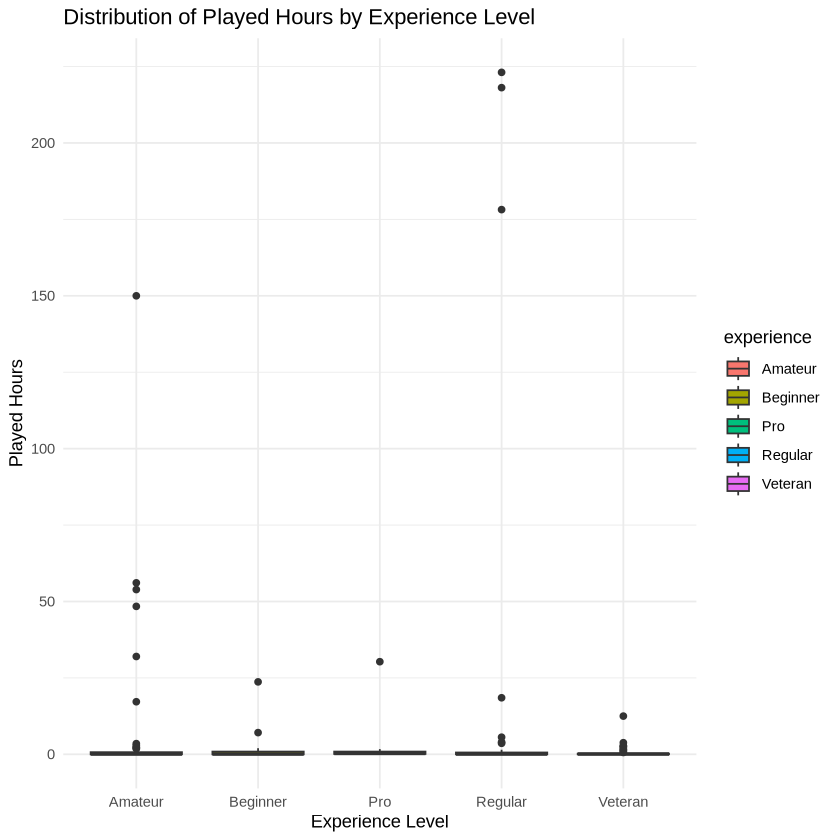

In [49]:
ggplot(player, aes(x = experience, y = played_hours, fill = experience)) +
  geom_boxplot() +
  labs(title = "Distribution of Played Hours by Experience Level",
       x = "Experience Level",
       y = "Played Hours") +
  theme_minimal()


In [51]:
t.test(age ~ subscribe, data = player)


	Welch Two Sample t-test

data:  age by subscribe
t = 2.5403, df = 68.44, p-value = 0.01335
alternative hypothesis: true difference in means between group FALSE and group TRUE is not equal to 0
95 percent confidence interval:
 0.7653315 6.3684713
sample estimates:
mean in group FALSE  mean in group TRUE 
            23.7500             20.1831 


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


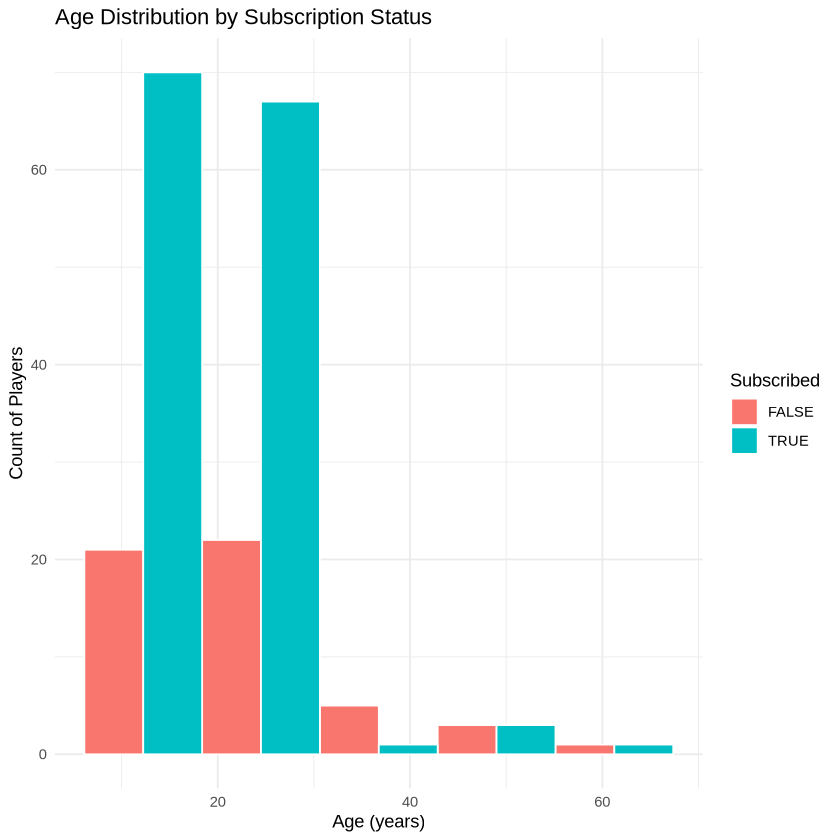

In [58]:
ggplot(player, aes(x = age, fill = subscribe)) +
  geom_histogram(position = "dodge", bins = 5, color = "white") +
  labs(
    title = "Age Distribution by Subscription Status",
    x = "Age (years)",
    y = "Count of Players",
    fill = "Subscribed"
  ) +
  theme_minimal()


Git hub link: https://github.com/nancytrinh/Individual-Planning-Stage-Hong-To-Nhu-Trinh.git

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


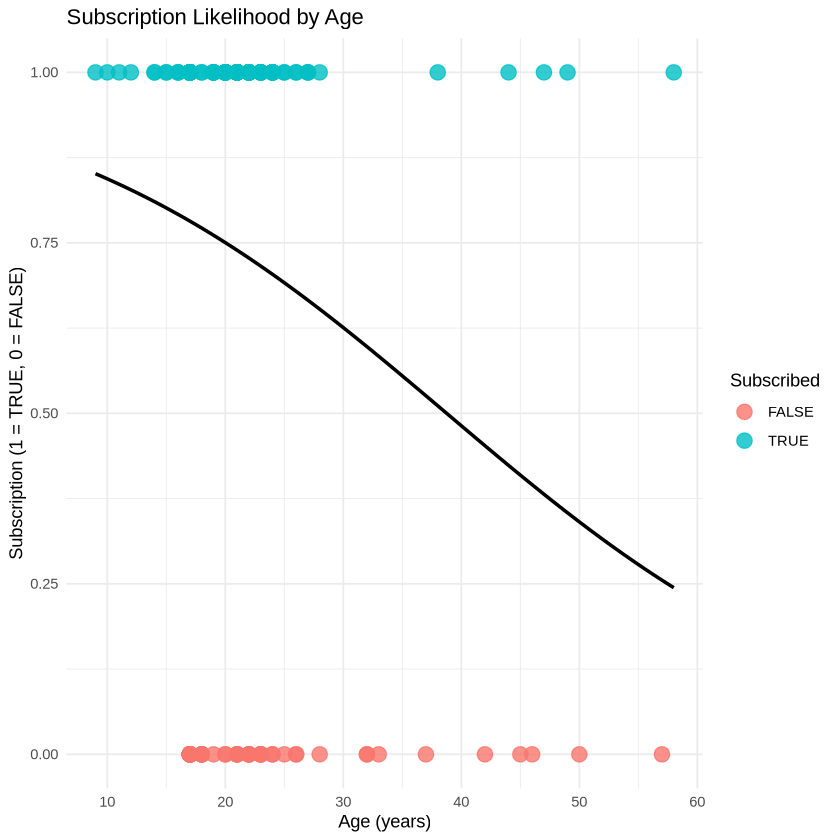

In [56]:
ggplot(player, aes(x = age, y = as.numeric(subscribe), color = subscribe)) +
  geom_point(size = 4, alpha = 0.8) +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE, color = "black") +
  labs(
    title = "Subscription Likelihood by Age",
    x = "Age (years)",
    y = "Subscription (1 = TRUE, 0 = FALSE)",
    color = "Subscribed"
  ) +
  theme_minimal()